<a href="https://colab.research.google.com/github/PaulinaPacyna/master-thesis/blob/enhance_ensemble/src/transfer_learning_ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, sys

if os.path.abspath(".") == "/content":  # google colab
    from google.colab import drive

    drive.mount("/content/drive")

    os.chdir("/content/drive/My Drive/master-thesis/src")
    %pip install sktime keras==2.8.0 tensorflow==2.8.2 keras-nlp==0.4.0 mlflow GitPython tensorflow_addons==0.17.1 databricks-cli  --quiet

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 89.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.0/498.0 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.5/337.5 KB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 77.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 76.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.4/82.4 KB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 103.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 KB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.

In [2]:
from experiments import train_plain_model, train_ensemble_model
from mlflow_logging import MlFlowLogging
from reading import ConcatenatedDataset
import mlflow

INFO:root:Loading only one dataset: CinCECGTorso
INFO:root:Loading only one dataset: CinCECGTorso
 0.00280899 0.00284091 0.00284091 0.00280899 0.00284091 0.00280899
 0.00280899 0.00280899 0.00280899 0.00280899 0.00280899 0.00280899
 0.00284091 0.00280899 0.00280899 0.00280899 0.00' had length 3965, which exceeded length limit of 500


Epoch 1/10
  5/340 [..............................] - ETA: 20s - loss: 1.4229 - accuracy: 0.2125

340/340 [==============================] - 30s 49ms/step - loss: 1.0458 - accuracy: 0.6330 - val_loss: 0.8513 - val_accuracy: 0.7746
Epoch 2/10
340/340 [==============================] - 16s 46ms/step - loss: 0.8295 - accuracy: 0.7627 - val_loss: 0.7171 - val_accuracy: 0.8225
Epoch 3/10
340/340 [==============================] - 16s 48ms/step - loss: 0.7348 - accuracy: 0.8026 - val_loss: 0.6371 - val_accuracy: 0.8648
Epoch 4/10
340/340 [==============================] - 16s 46ms/step - loss: 0.6635 - accuracy: 0.8336 - val_loss: 0.5755 - val_accuracy: 0.8789
Epoch 5/10
340/340 [==============================] - 16s 45ms/step - loss: 0.6057 - accuracy: 0.8597 - val_loss: 0.5243 - val_accuracy: 0.8930
Epoch 6/10
340/340 [==============================] - 16s 46ms/step - loss: 0.5575 - accuracy: 0.8810 - val_loss: 0.4813 - val_accuracy: 0.9042
Epoch 7/10
340/340 [==============================] - 15s 45ms/step - loss: 0.5163 - accuracy: 0.8986 - val_loss: 0.4443 - val_accuracy: 0.9324
Epo

INFO:root:Loading only one dataset: CinCECGTorso
INFO:root:Loading only one dataset: CinCECGTorso
 0.00280899 0.00280899 0.00284091 0.00280899 0.00280899 0.00284091
 0.00280899 0.00280899 0.00284091 0.00280899 0.00280899 0.00284091
 0.00280899 0.00280899 0.00280899 0.00280899 0.00' had length 3965, which exceeded length limit of 500


Epoch 1/10
  6/340 [..............................] - ETA: 23s - loss: 1.3743 - accuracy: 0.3281

340/340 [==============================] - 20s 47ms/step - loss: 1.1427 - accuracy: 0.5617 - val_loss: 1.2664 - val_accuracy: 0.3014
Epoch 2/10
340/340 [==============================] - 16s 48ms/step - loss: 0.9255 - accuracy: 0.6925 - val_loss: 0.8700 - val_accuracy: 0.7127
Epoch 3/10
340/340 [==============================] - 16s 47ms/step - loss: 0.8188 - accuracy: 0.7388 - val_loss: 0.7402 - val_accuracy: 0.7944
Epoch 4/10
340/340 [==============================] - 16s 47ms/step - loss: 0.7427 - accuracy: 0.7724 - val_loss: 0.6653 - val_accuracy: 0.8085
Epoch 5/10
340/340 [==============================] - 15s 44ms/step - loss: 0.6783 - accuracy: 0.8005 - val_loss: 0.6024 - val_accuracy: 0.8338
Epoch 6/10
340/340 [==============================] - 16s 45ms/step - loss: 0.6209 - accuracy: 0.8252 - val_loss: 0.5462 - val_accuracy: 0.8423
Epoch 7/10
340/340 [==============================] - 15s 45ms/step - loss: 0.5693 - accuracy: 0.8471 - val_loss: 0.4959 - val_accuracy: 0.8761
Epo

INFO:root:Loading only one dataset: ECG200
INFO:root:Loading only one dataset: ECG200
 0.005 0.005 0.01  0.005 0.005 0.01  0.005 0.005 0.005 0.005 0.005 0.01
 0.01  0.005 0.005 0.01  0.005 0.01  0.005 0.005 0.005 0.01  0.01  0.005
 0.005 0.005 0.005 0.01  0.01  0.' had length 908, which exceeded length limit of 500
 0.02941176 0.02941176 0.01515152 0.01515152 0.01515152 0.02941176
 0.01515152 0.01515152 0.02941176 0.01515152 0.01515152 0.01515152
 0.01515152 0.02941176 0.01515152 0.01515152 0.02' had length 559, which exceeded length limit of 500


Epoch 1/10
 5/50 [==>...........................] - ETA: 2s - loss: 0.6880 - accuracy: 0.4812

50/50 [==============================] - 8s 55ms/step - loss: 0.6457 - accuracy: 0.6806 - val_loss: 0.6068 - val_accuracy: 0.7800
Epoch 2/10
50/50 [==============================] - 2s 43ms/step - loss: 0.5756 - accuracy: 0.7794 - val_loss: 0.5358 - val_accuracy: 0.7800
Epoch 3/10
50/50 [==============================] - 2s 44ms/step - loss: 0.5269 - accuracy: 0.7894 - val_loss: 0.4957 - val_accuracy: 0.8000
Epoch 4/10
50/50 [==============================] - 2s 47ms/step - loss: 0.4957 - accuracy: 0.8163 - val_loss: 0.4700 - val_accuracy: 0.8000
Epoch 5/10
50/50 [==============================] - 3s 56ms/step - loss: 0.4727 - accuracy: 0.8263 - val_loss: 0.4488 - val_accuracy: 0.8000
Epoch 6/10
50/50 [==============================] - 3s 53ms/step - loss: 0.4545 - accuracy: 0.8363 - val_loss: 0.4283 - val_accuracy: 0.8000
Epoch 7/10
50/50 [==============================] - 2s 46ms/step - loss: 0.4394 - accuracy: 0.8400 - val_loss: 0.4125 - val_accuracy: 0.8400
Epoch 8/10
50/50 [======

INFO:root:Loading only one dataset: ECG200
INFO:root:Loading only one dataset: ECG200
 0.005 0.005 0.01  0.005 0.005 0.01  0.01  0.01  0.005 0.005 0.005 0.01
 0.01  0.005 0.005 0.01  0.005 0.005 0.005 0.005 0.005 0.01  0.005 0.01
 0.01  0.005 0.005 0.005 0.01  0.0' had length 909, which exceeded length limit of 500
 0.01515152 0.01515152 0.01515152 0.01515152 0.01515152 0.01515152
 0.02941176 0.01515152 0.01515152 0.01515152 0.01515152 0.02941176
 0.01515152 0.01515152 0.02941176 0.01515152 0.01' had length 559, which exceeded length limit of 500


Epoch 1/10
 5/50 [==>...........................] - ETA: 2s - loss: 0.7619 - accuracy: 0.4625

50/50 [==============================] - 6s 55ms/step - loss: 0.7009 - accuracy: 0.5000 - val_loss: 0.6901 - val_accuracy: 0.5400
Epoch 2/10
50/50 [==============================] - 3s 51ms/step - loss: 0.6445 - accuracy: 0.7194 - val_loss: 0.6877 - val_accuracy: 0.5400
Epoch 3/10
50/50 [==============================] - 3s 53ms/step - loss: 0.6058 - accuracy: 0.7981 - val_loss: 0.6827 - val_accuracy: 0.5200
Epoch 4/10
50/50 [==============================] - 2s 46ms/step - loss: 0.5707 - accuracy: 0.8050 - val_loss: 0.6734 - val_accuracy: 0.5400
Epoch 5/10
50/50 [==============================] - 2s 45ms/step - loss: 0.5402 - accuracy: 0.8119 - val_loss: 0.6606 - val_accuracy: 0.5400
Epoch 6/10
50/50 [==============================] - 2s 45ms/step - loss: 0.5143 - accuracy: 0.8200 - val_loss: 0.6437 - val_accuracy: 0.5400
Epoch 7/10
50/50 [==============================] - 2s 44ms/step - loss: 0.4926 - accuracy: 0.8263 - val_loss: 0.6222 - val_accuracy: 0.5400
Epoch 8/10
50/50 [======

INFO:root:Loading only one dataset: ECG5000
INFO:root:Loading only one dataset: ECG5000


Epoch 1/10
   5/1180 [..............................] - ETA: 1:12 - loss: 1.6318 - accuracy: 0.1625

1180/1180 [==============================] - 54s 43ms/step - loss: 1.1177 - accuracy: 0.6500 - val_loss: 1.0483 - val_accuracy: 0.6192
Epoch 2/10
 272/1180 [=====>........................] - ETA: 37s - loss: 0.9274 - accuracy: 0.7063

Process Keras_worker_ForkPoolWorker-83:
Traceback (most recent call last):
  File "/usr/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.9/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/usr/local/lib/python3.9/dist-packages/keras/utils/data_utils.py", line 566, in get_index
    return _SHARED_SEQUENCES[uid][i]
  File "/content/drive/Othercomputers/Mój laptop/src/preprocessing/fit_generator.py", line 78, in __getitem__
    return next(self)
  File "/content/drive/Othercomputers/Mój laptop/src/preprocessing/fit_generator.py", line 99, in __next__
    X_batch = self.prepare_X(self.X[index])
  File "/content/drive/Othercomputers/Mój laptop/src/preprocessing/fit_generator.py", line 117, in prepare_X
    X_batch = self.__normalize_rows(X_batch)
  File "/content/drive/Ot

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-22f5551ada19>", line 8, in <module>
    ensemble_training_results = train_ensemble_model(
  File "/content/drive/Othercomputers/Mój laptop/src/experiments/ensemble_category.py", line 97, in train_ensemble_model
    y,
  File "/usr/local/lib/python3.9/dist-packages/mlflow/utils/autologging_utils/safety.py", line 552, in safe_patch_function
    patch_function.call(call_original, *args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/mlflow/utils/autologging_utils/safety.py", line 170, in call
    return cls().__call__(original, *args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/mlflow/utils/autologging_utils/safety.py", line 181, in __call__
    raise e
  File "/usr/local/lib/python3.9/dist-packages/mlflow/utils/autologging_utils/safety.py", line 174,

KeyboardInterrupt: ignored

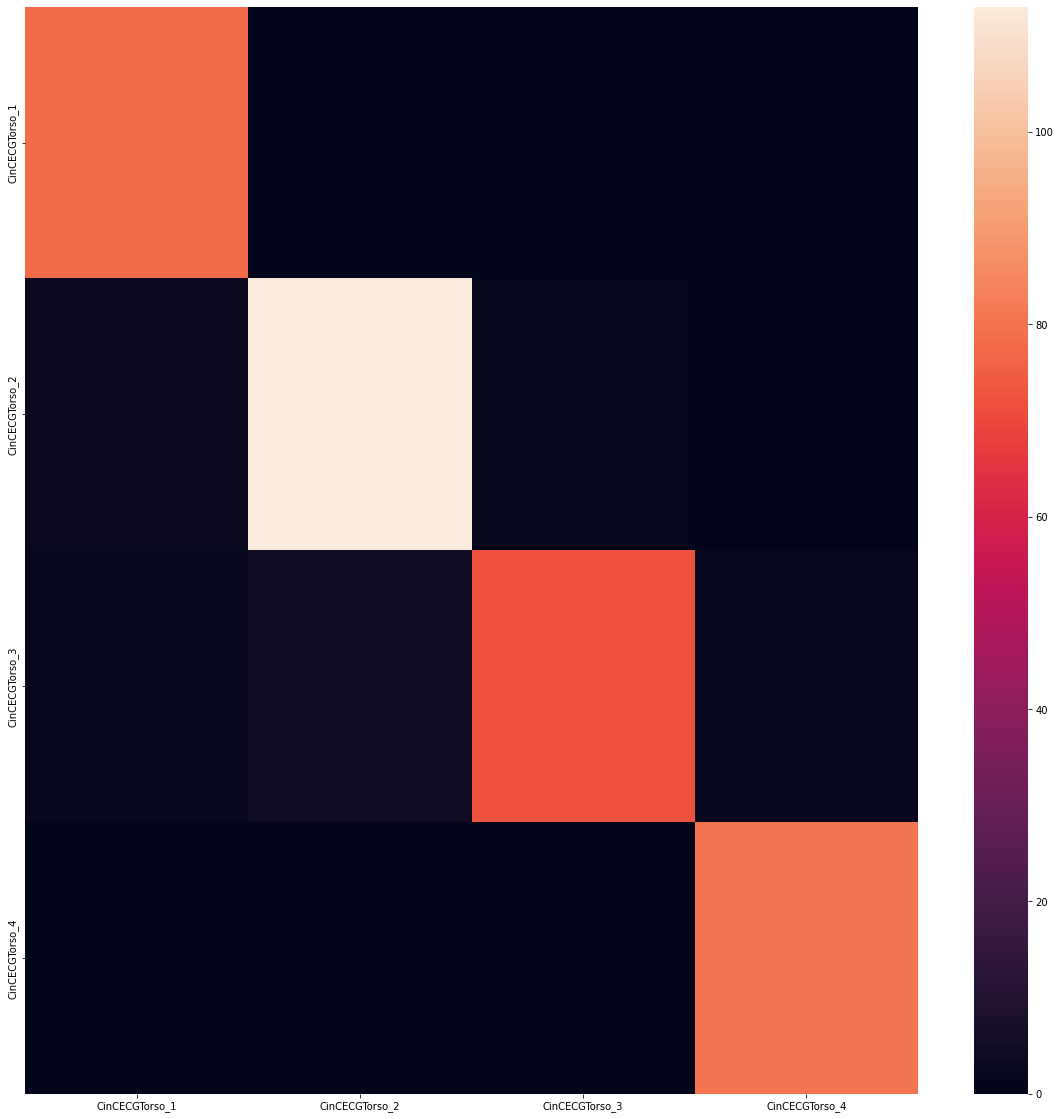

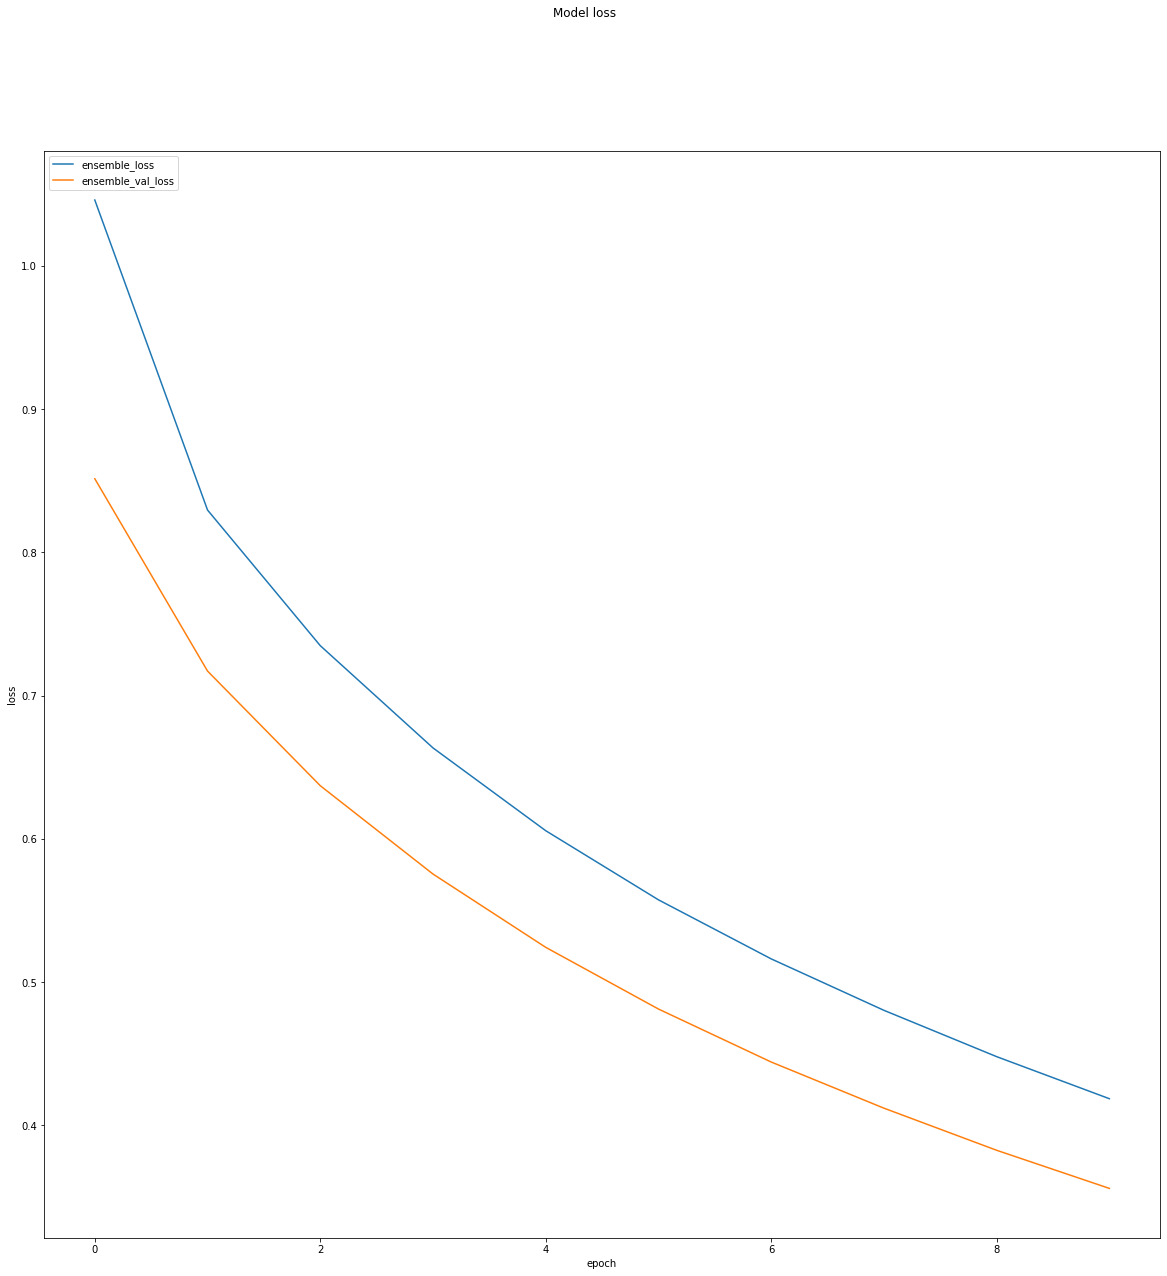

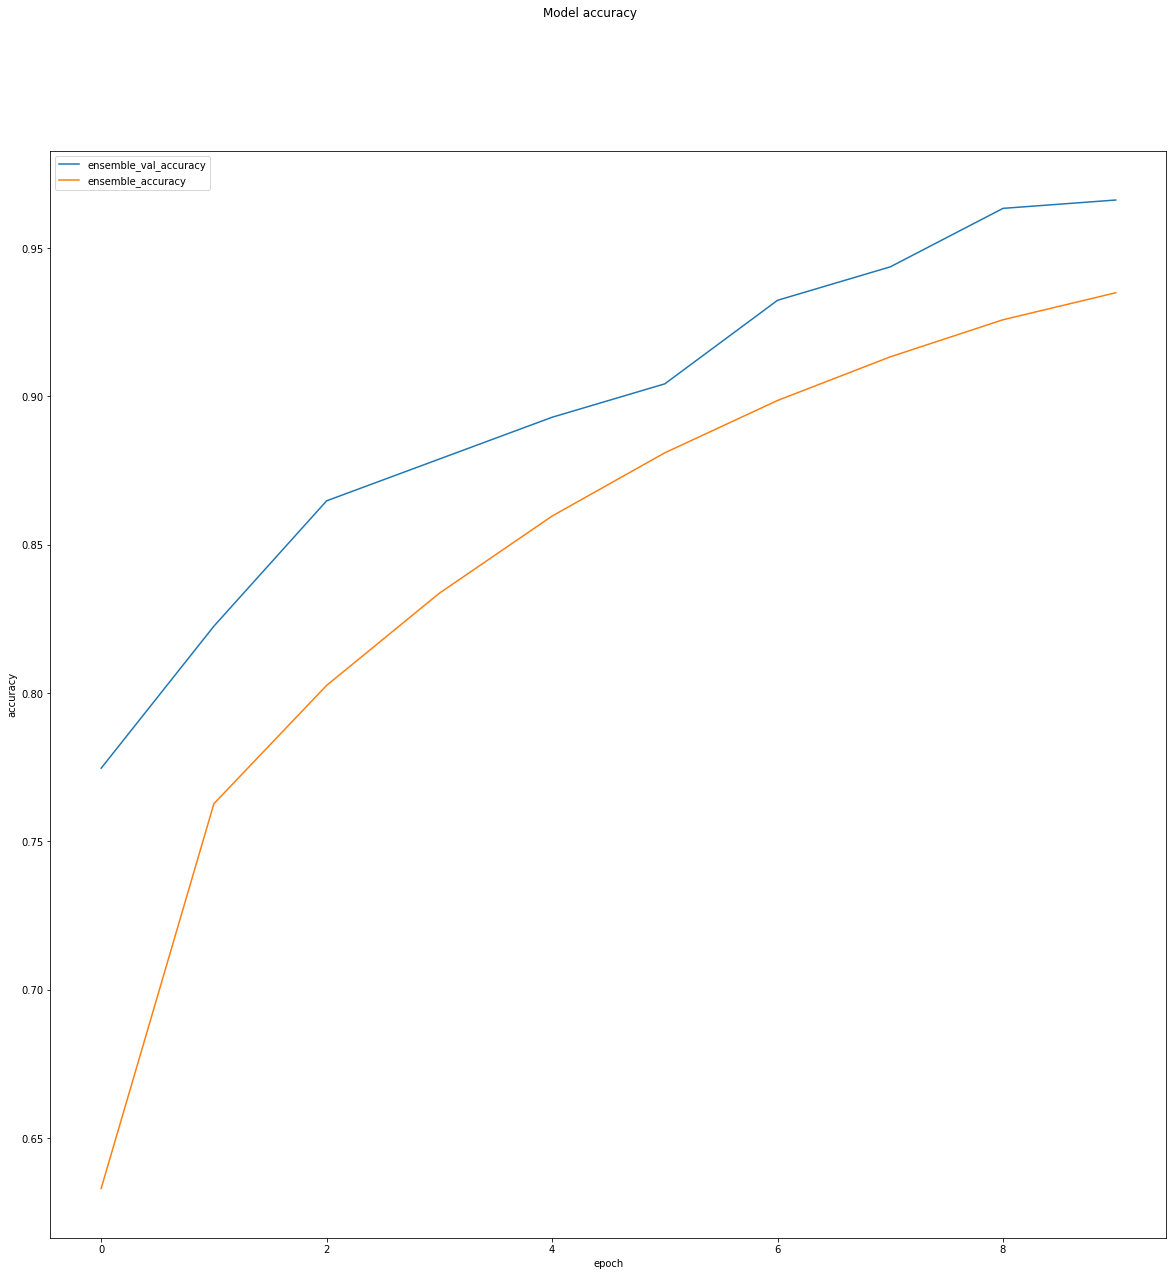

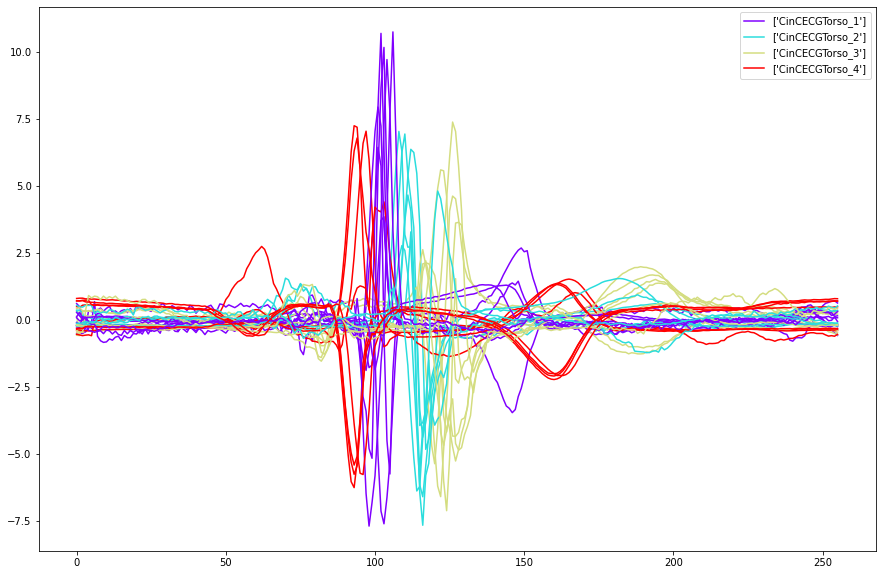

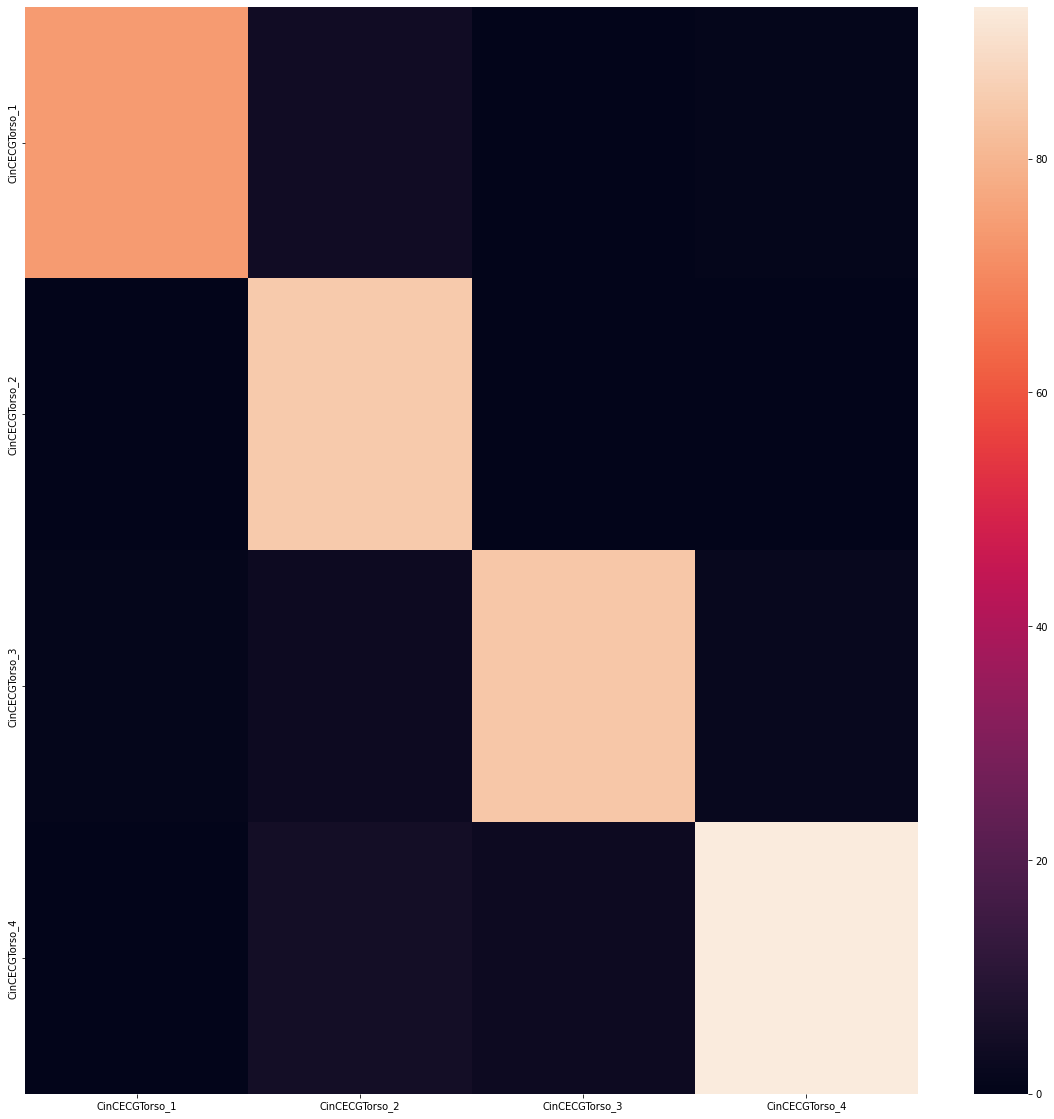

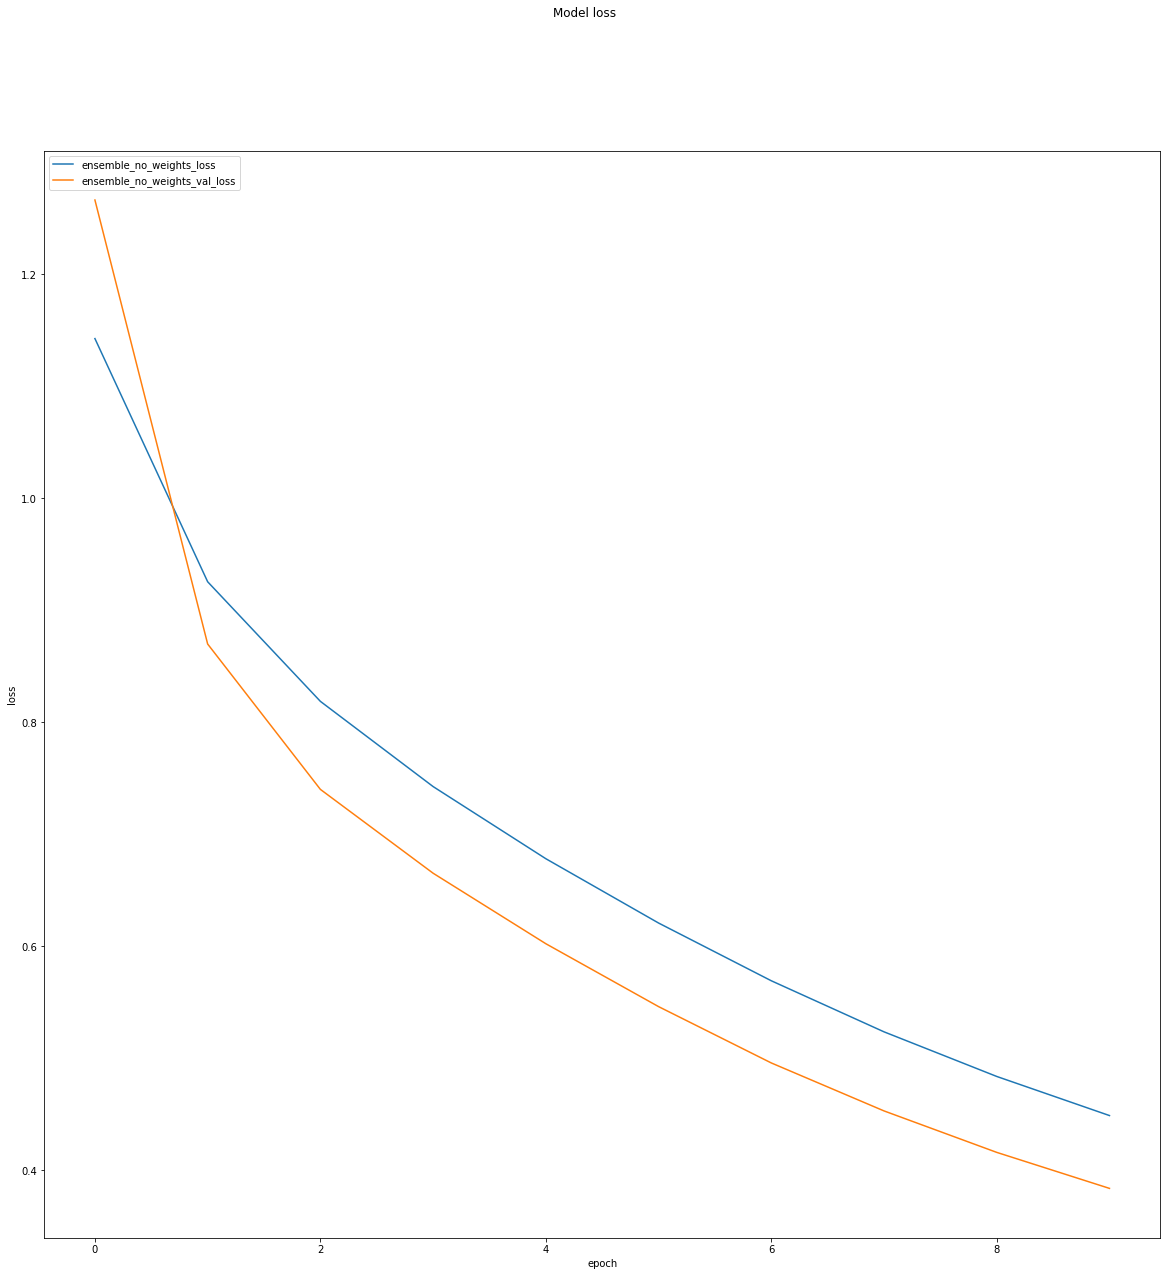

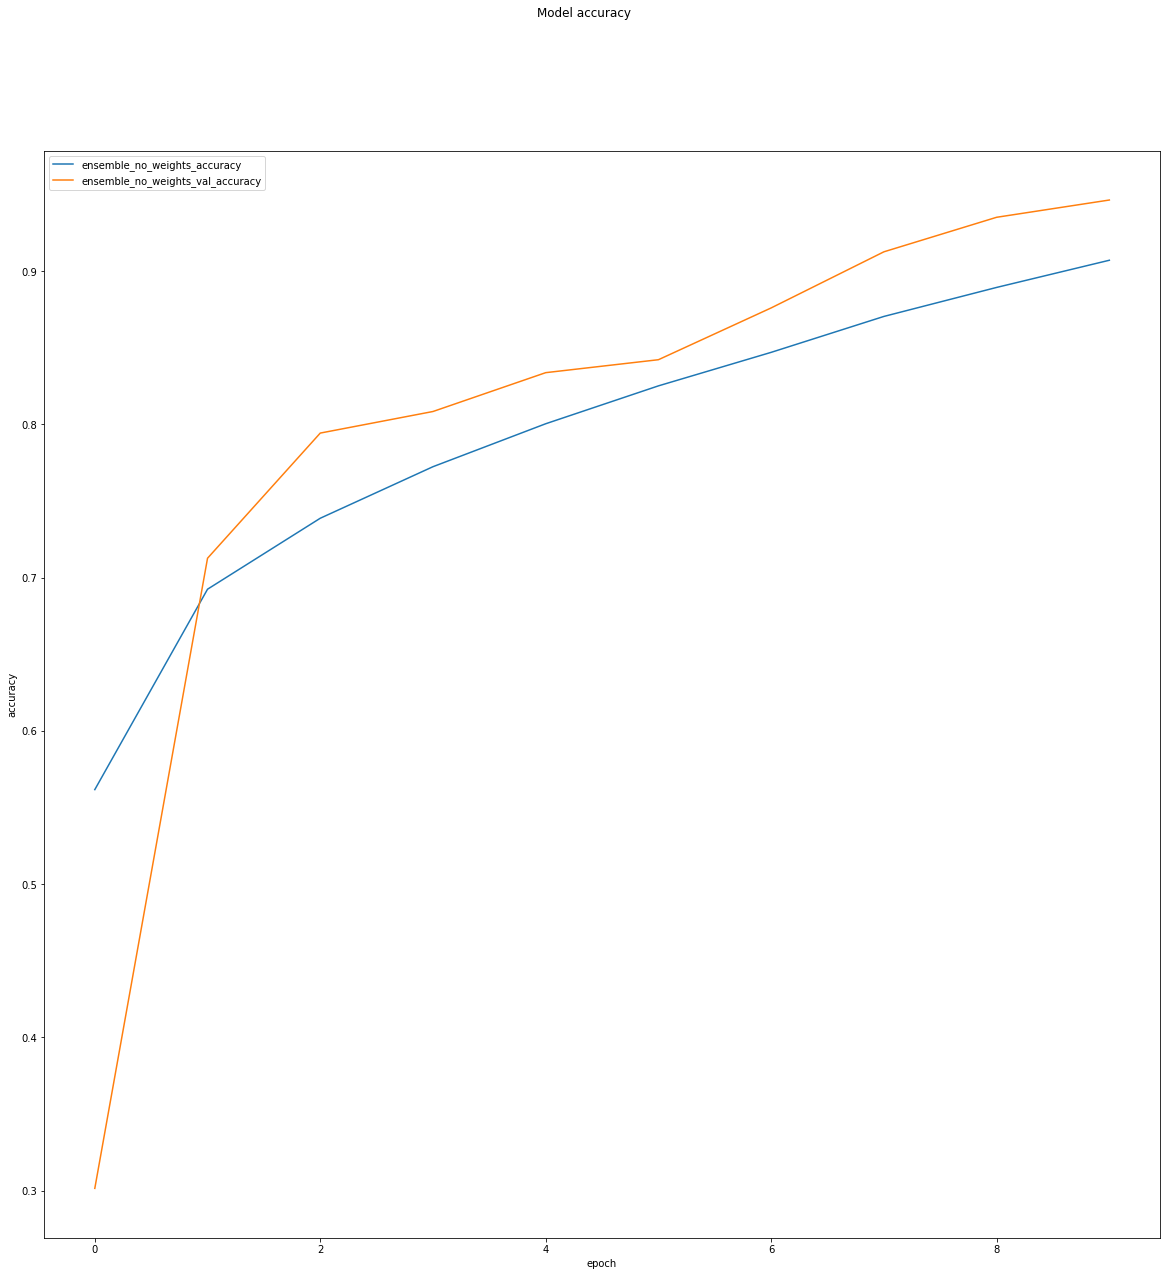

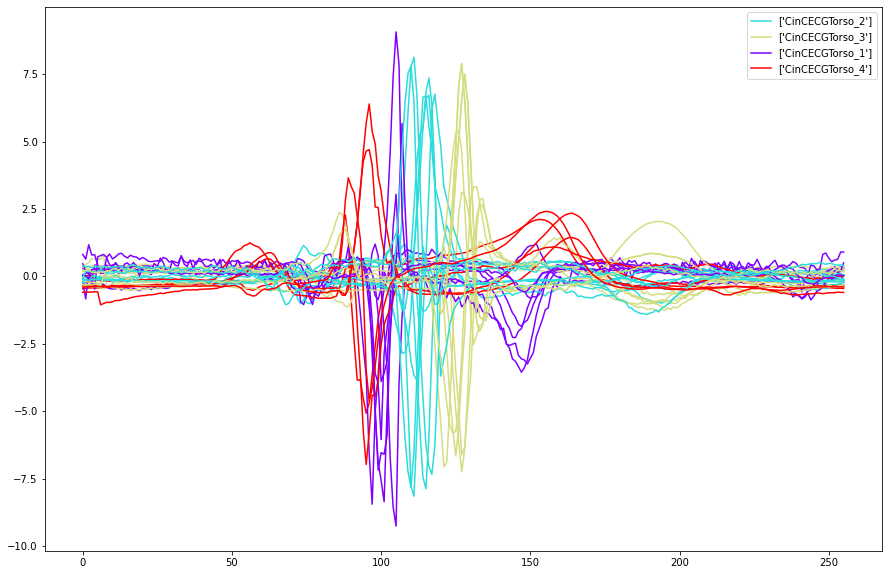

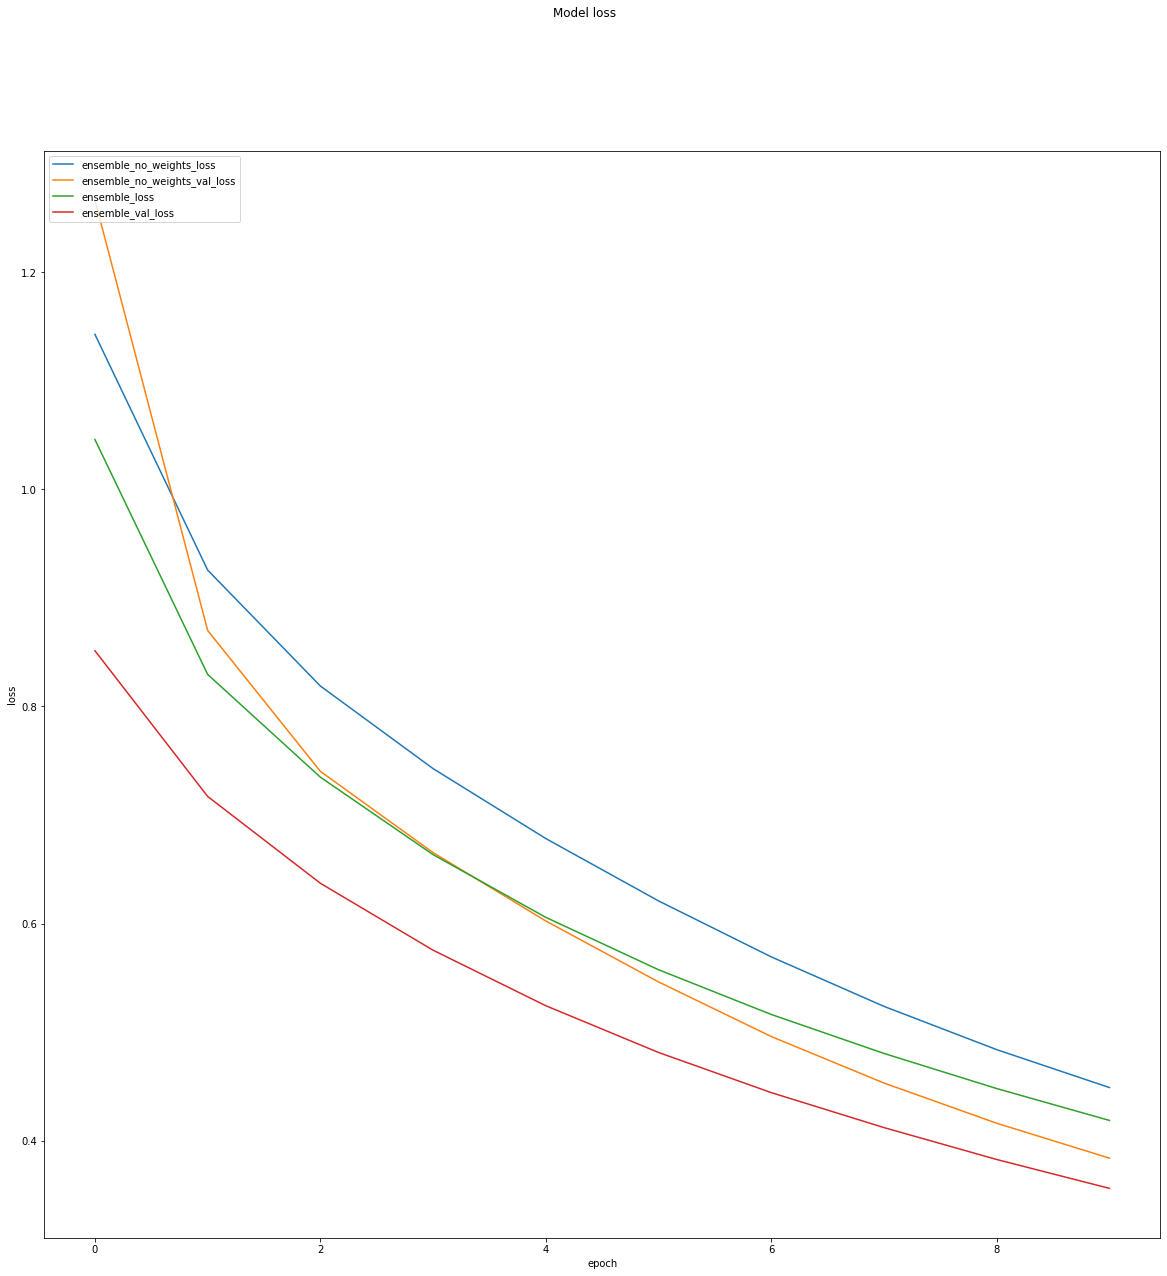

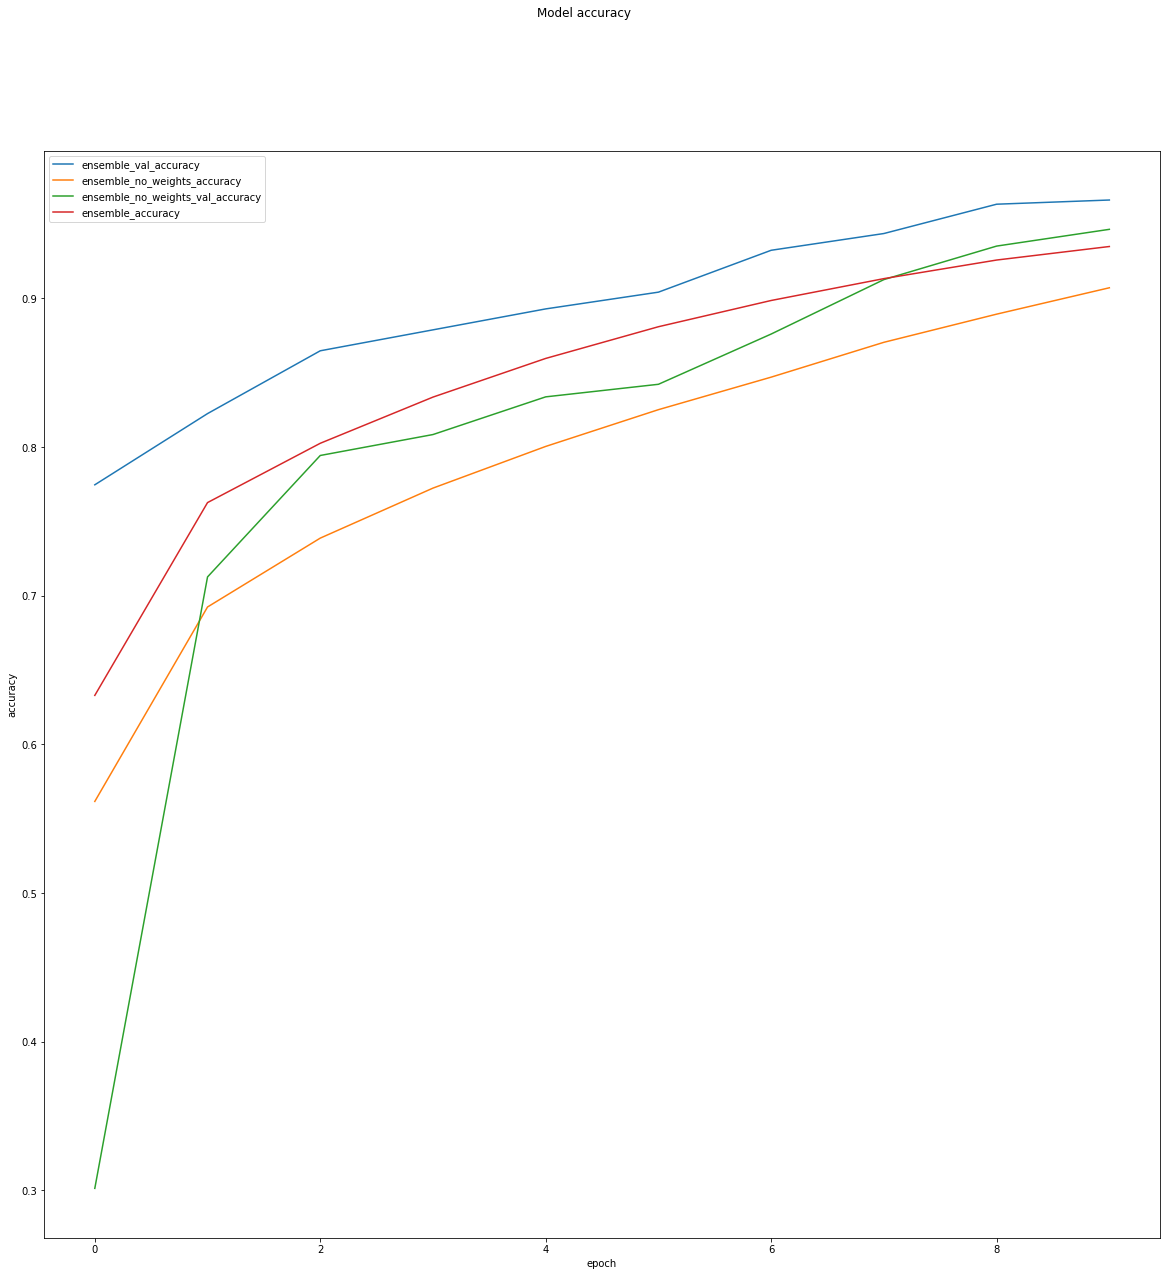

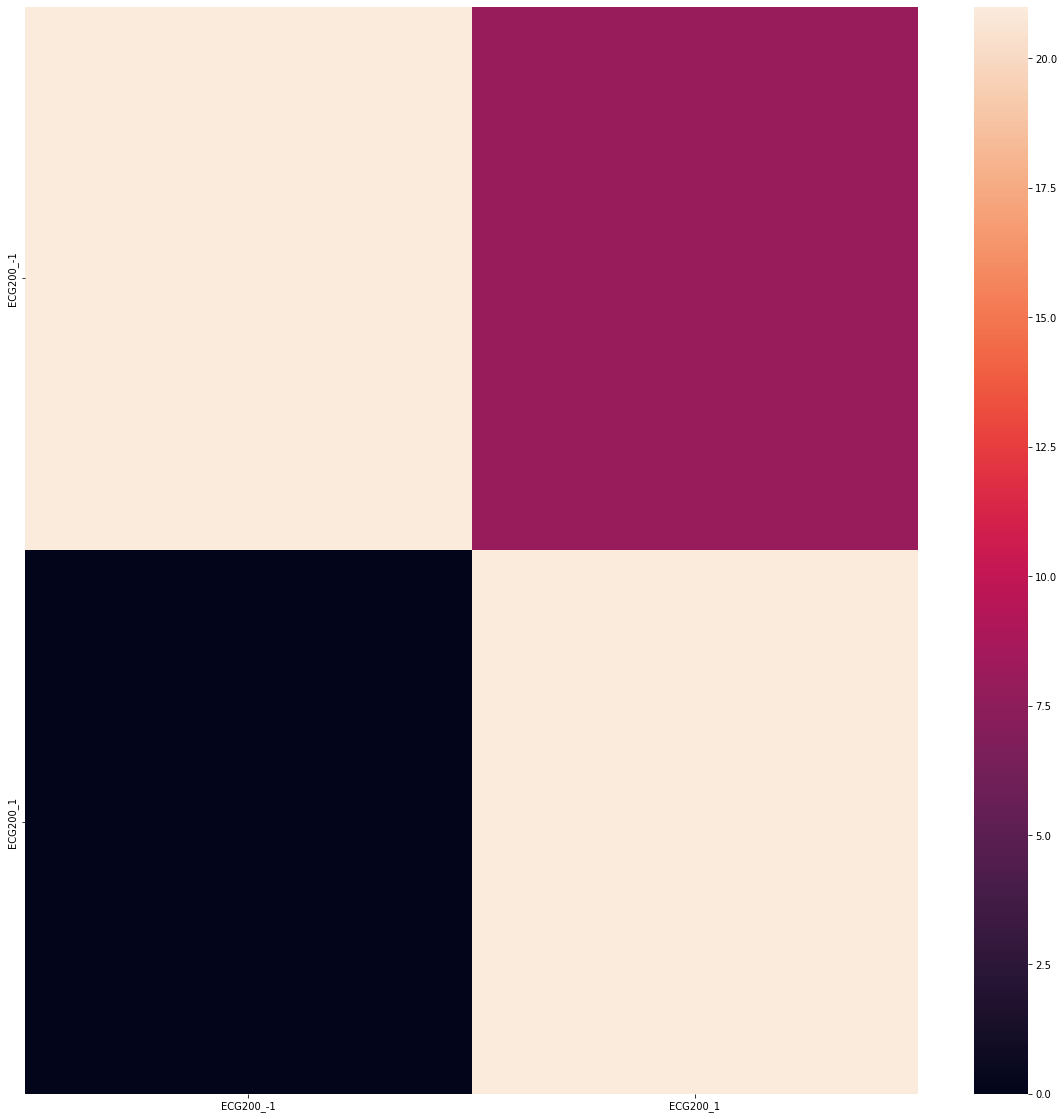

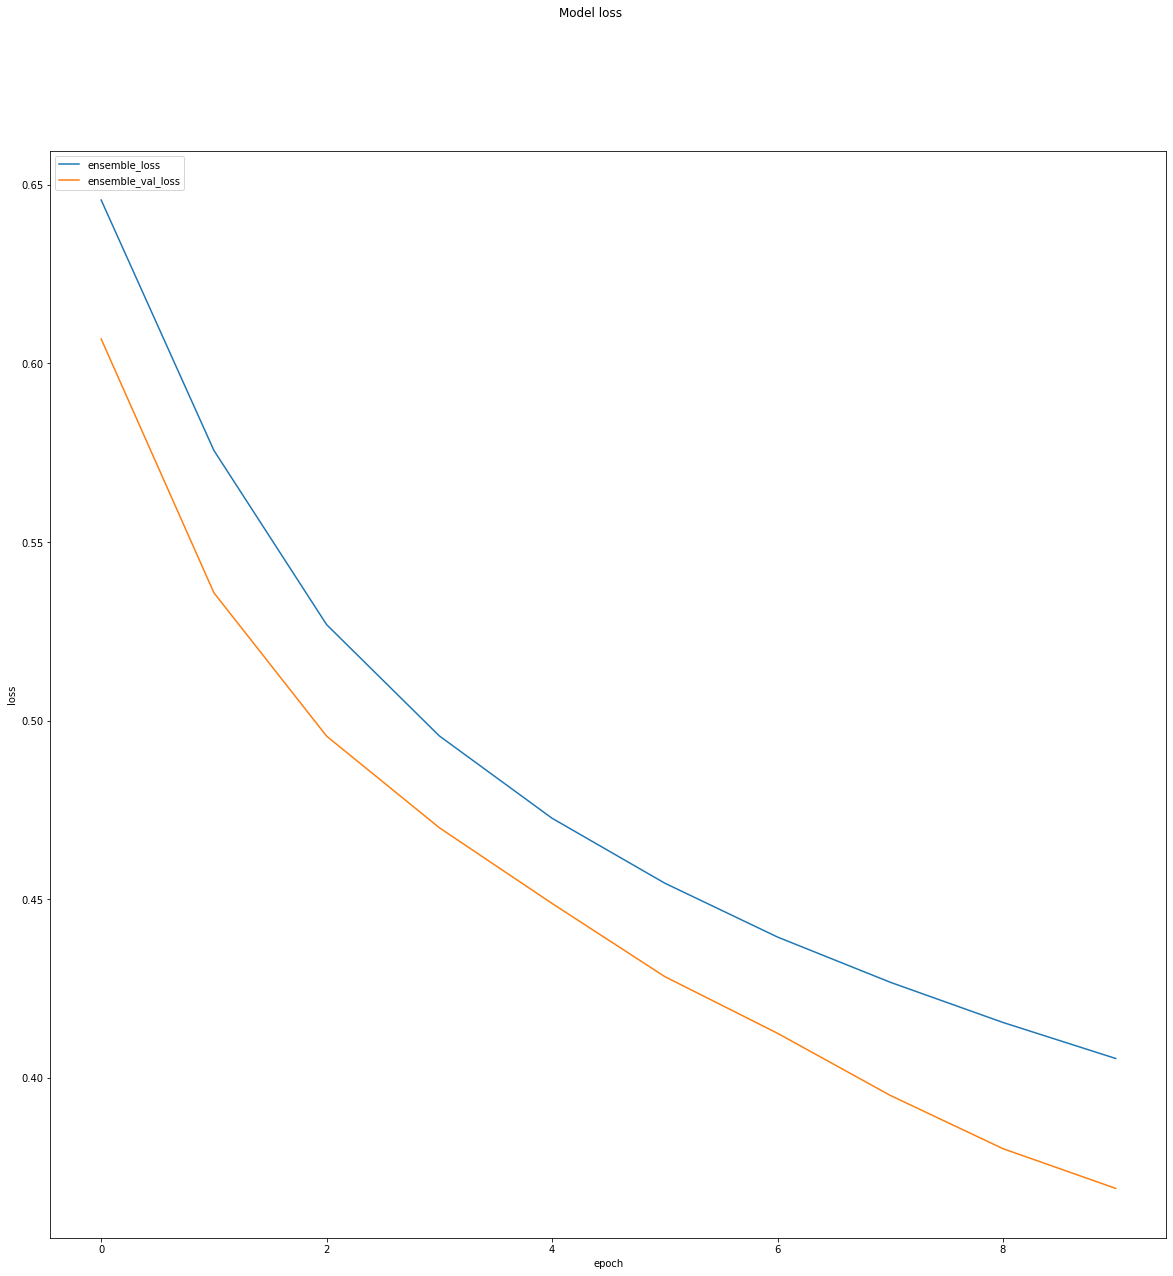

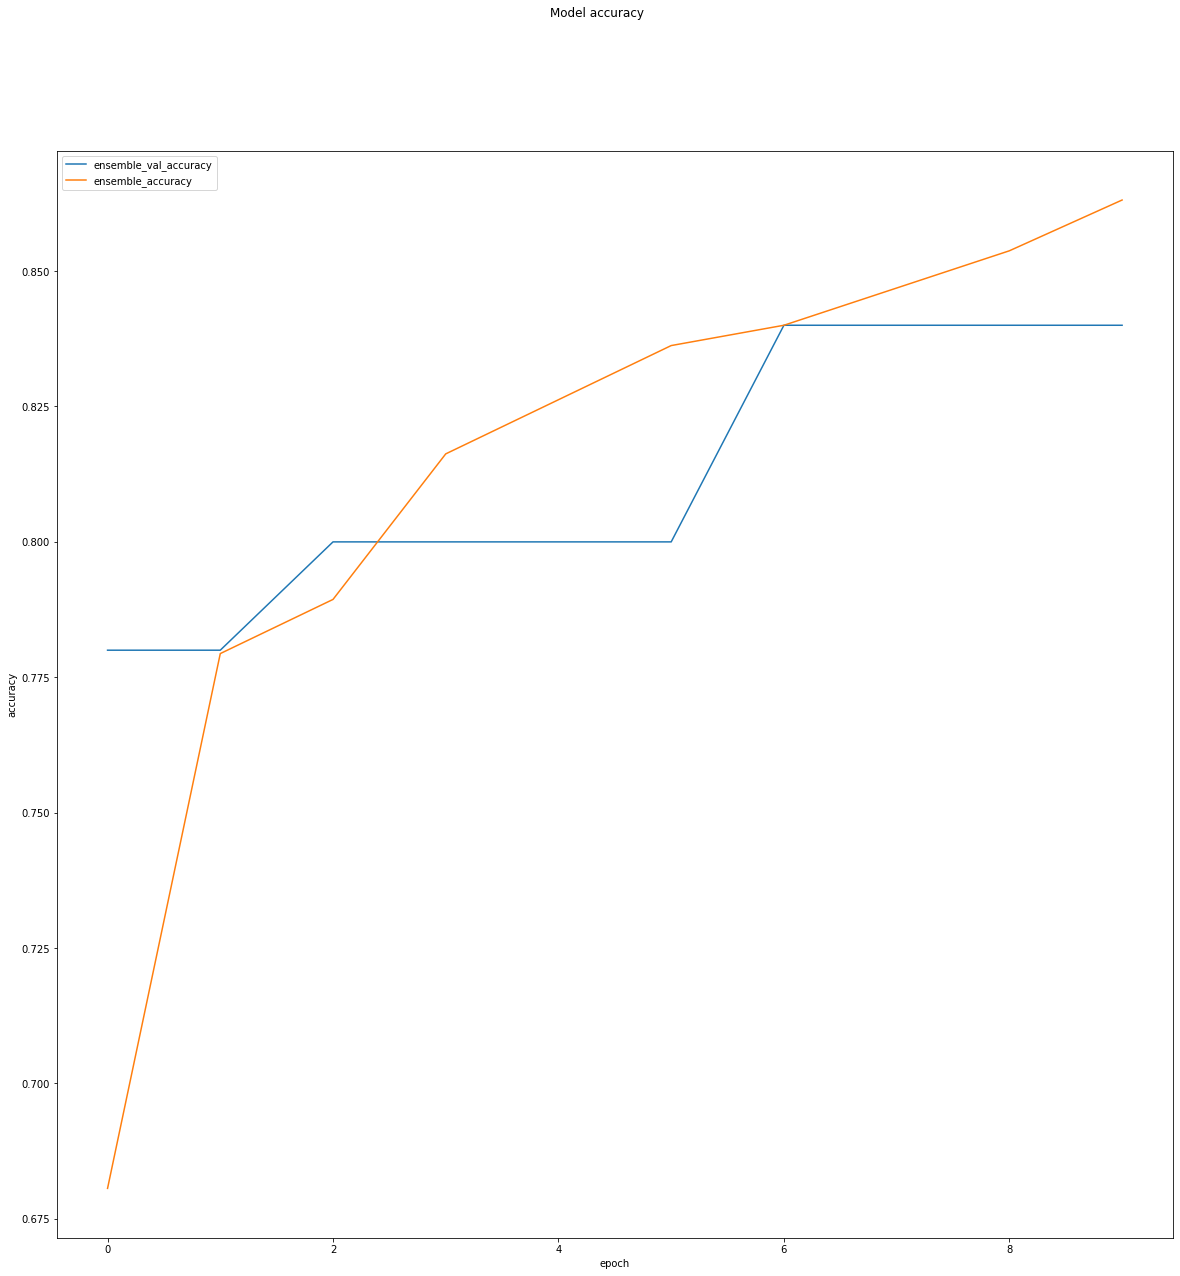

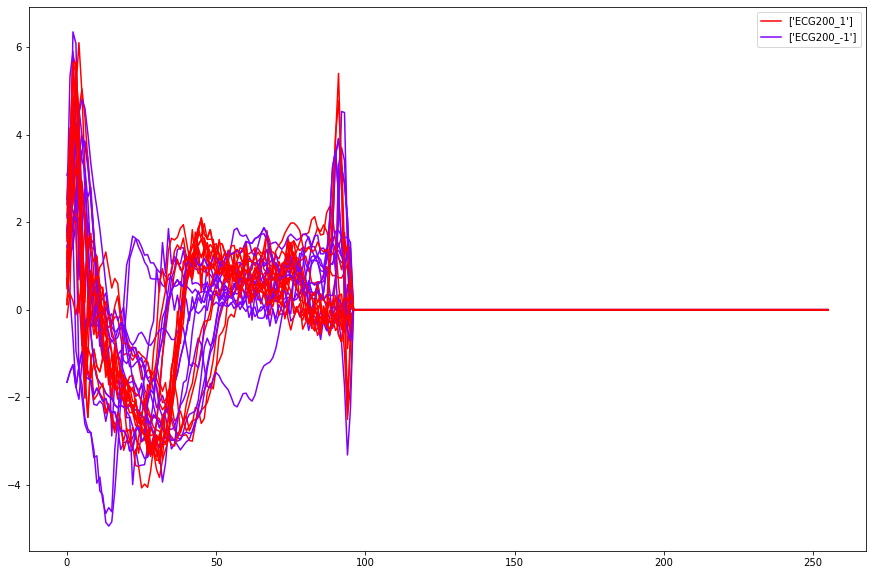

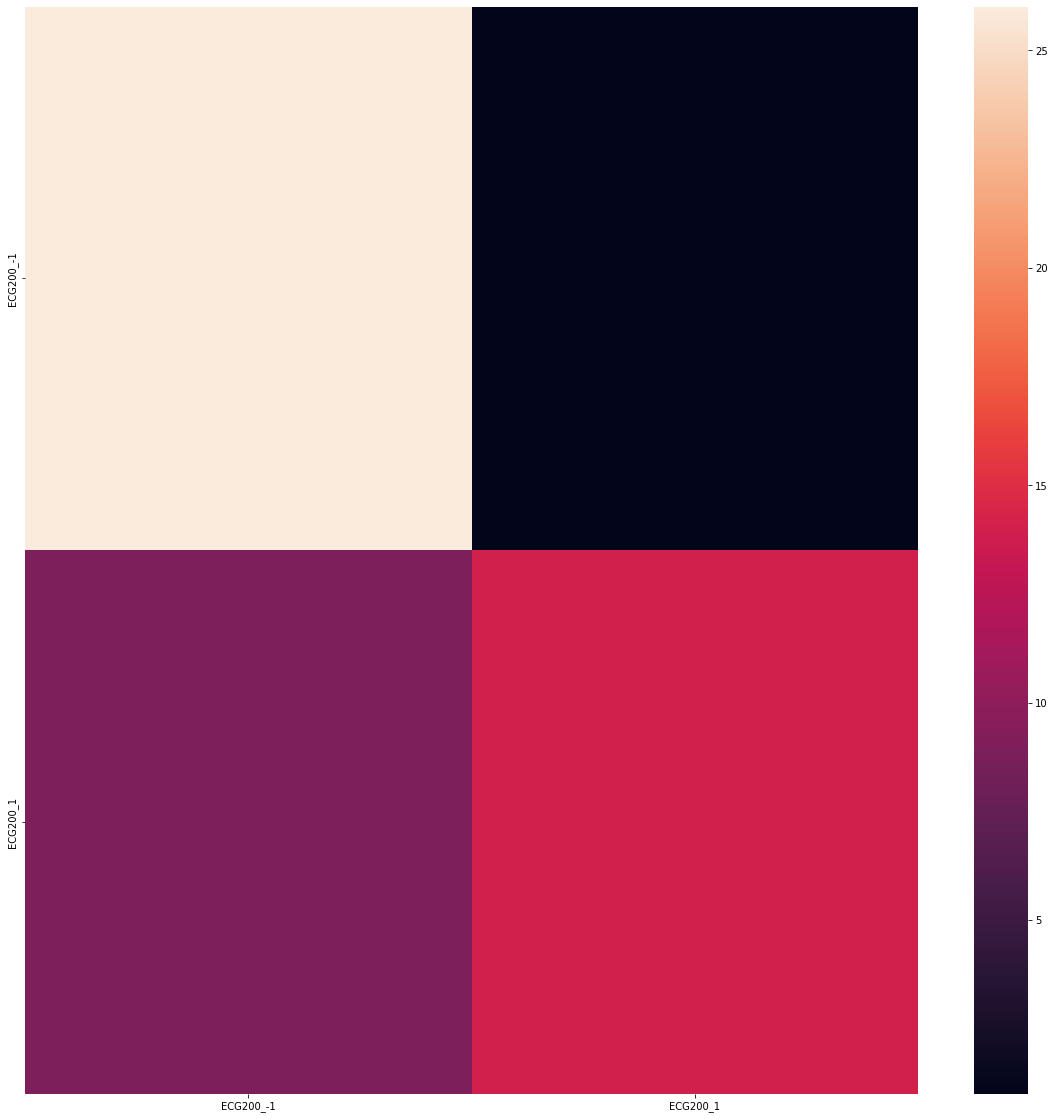

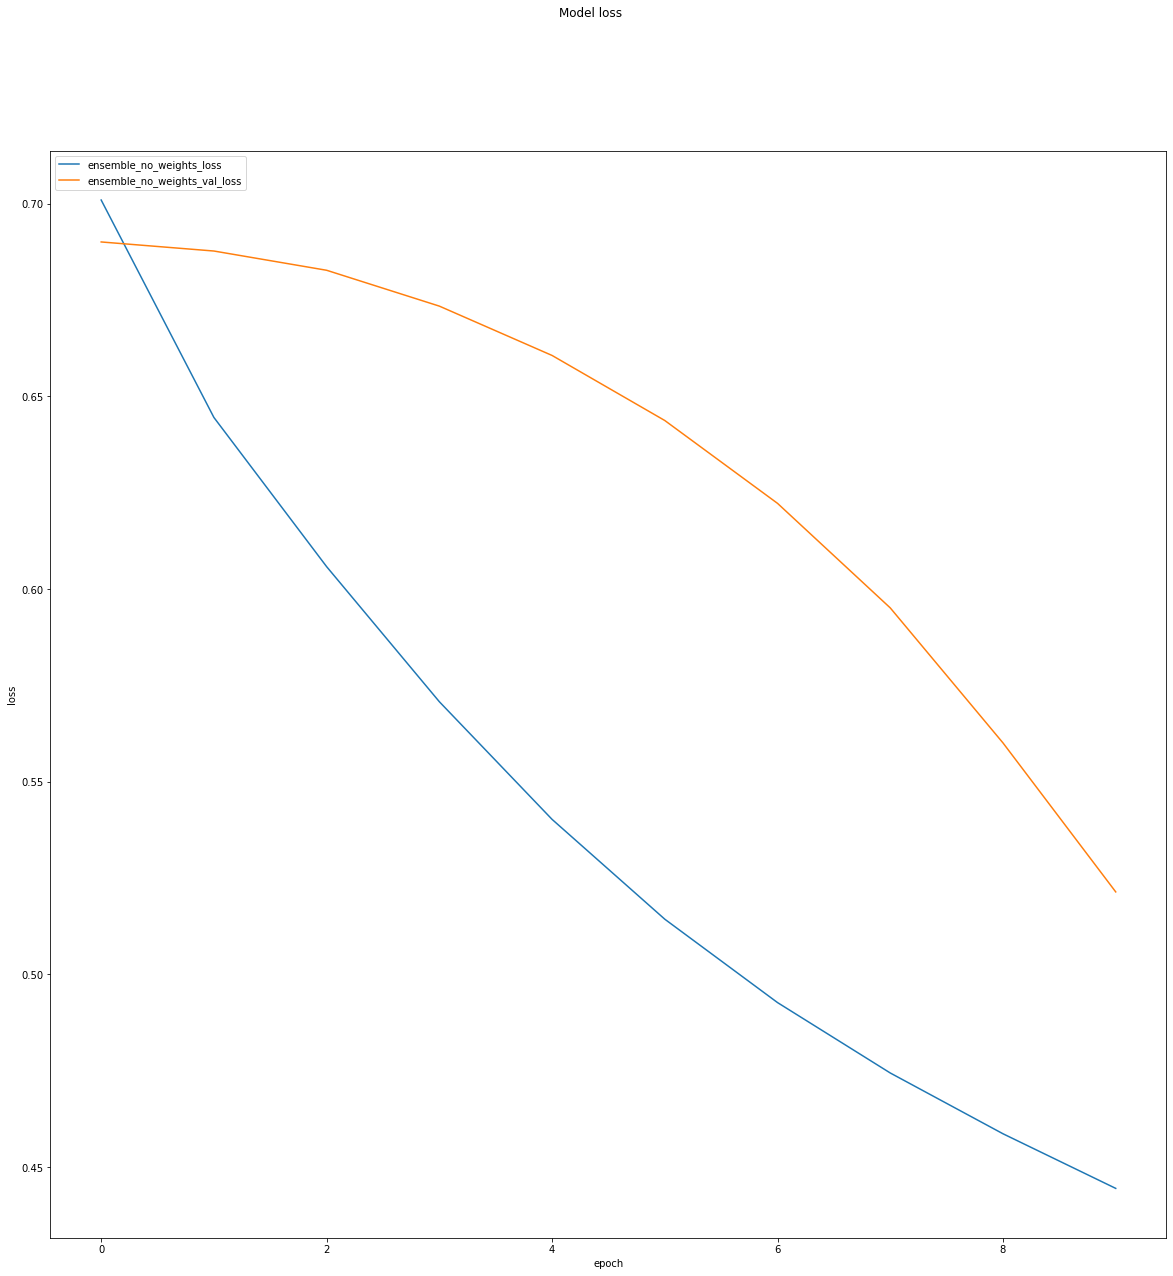

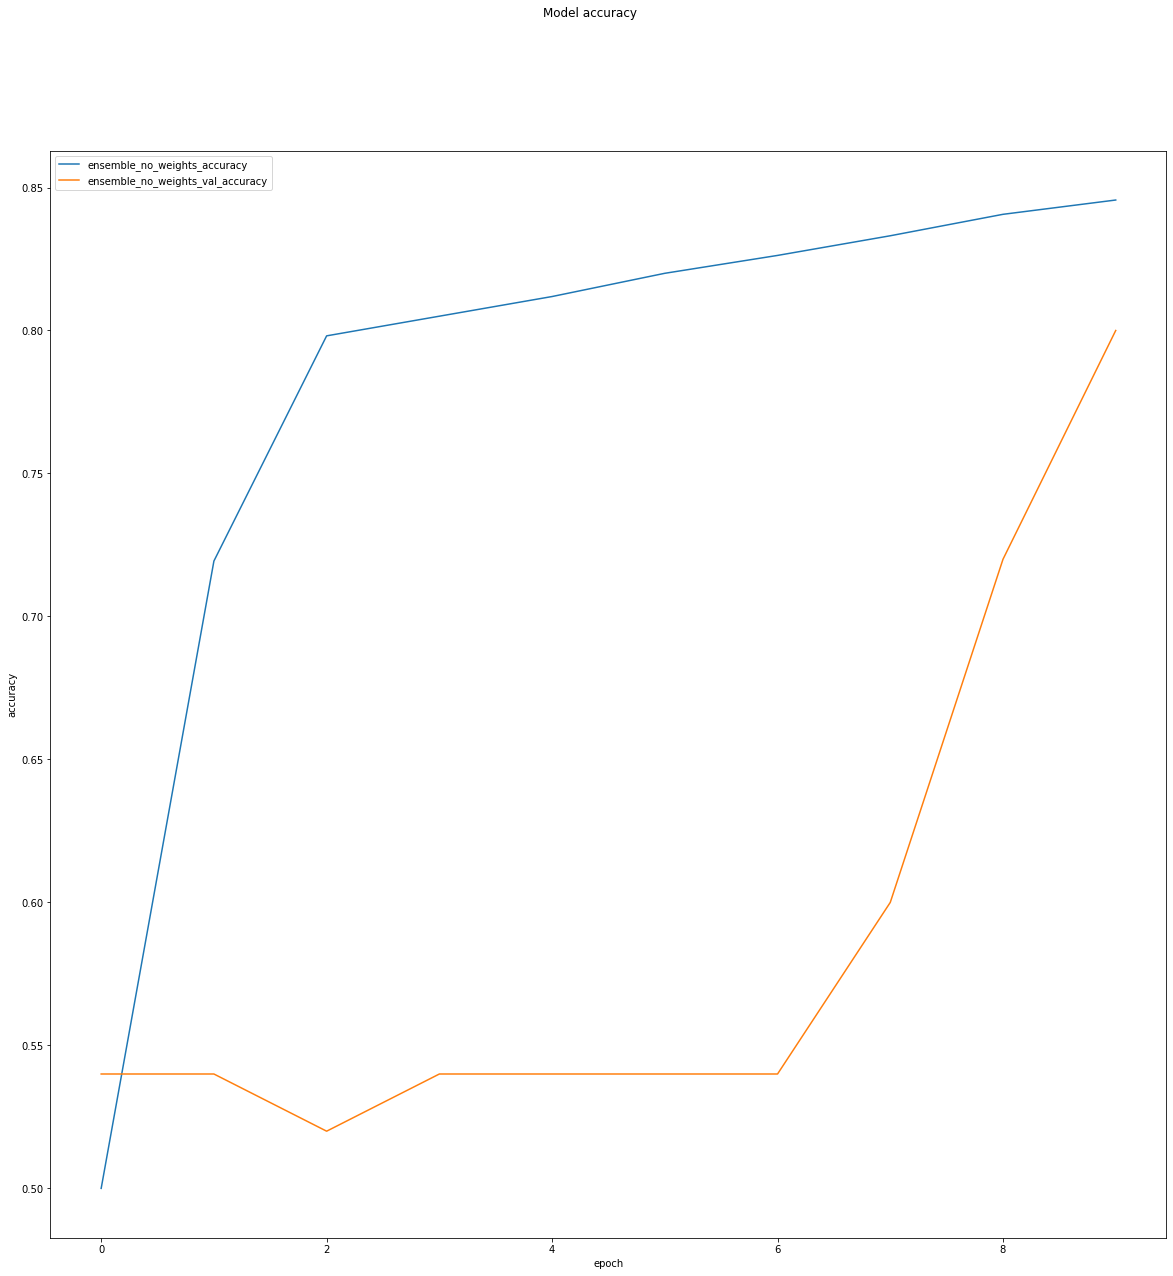

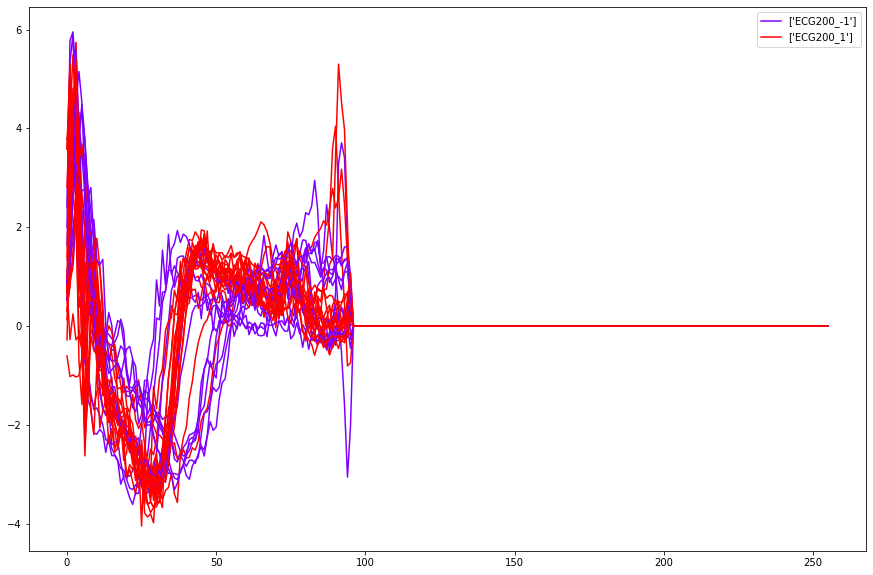

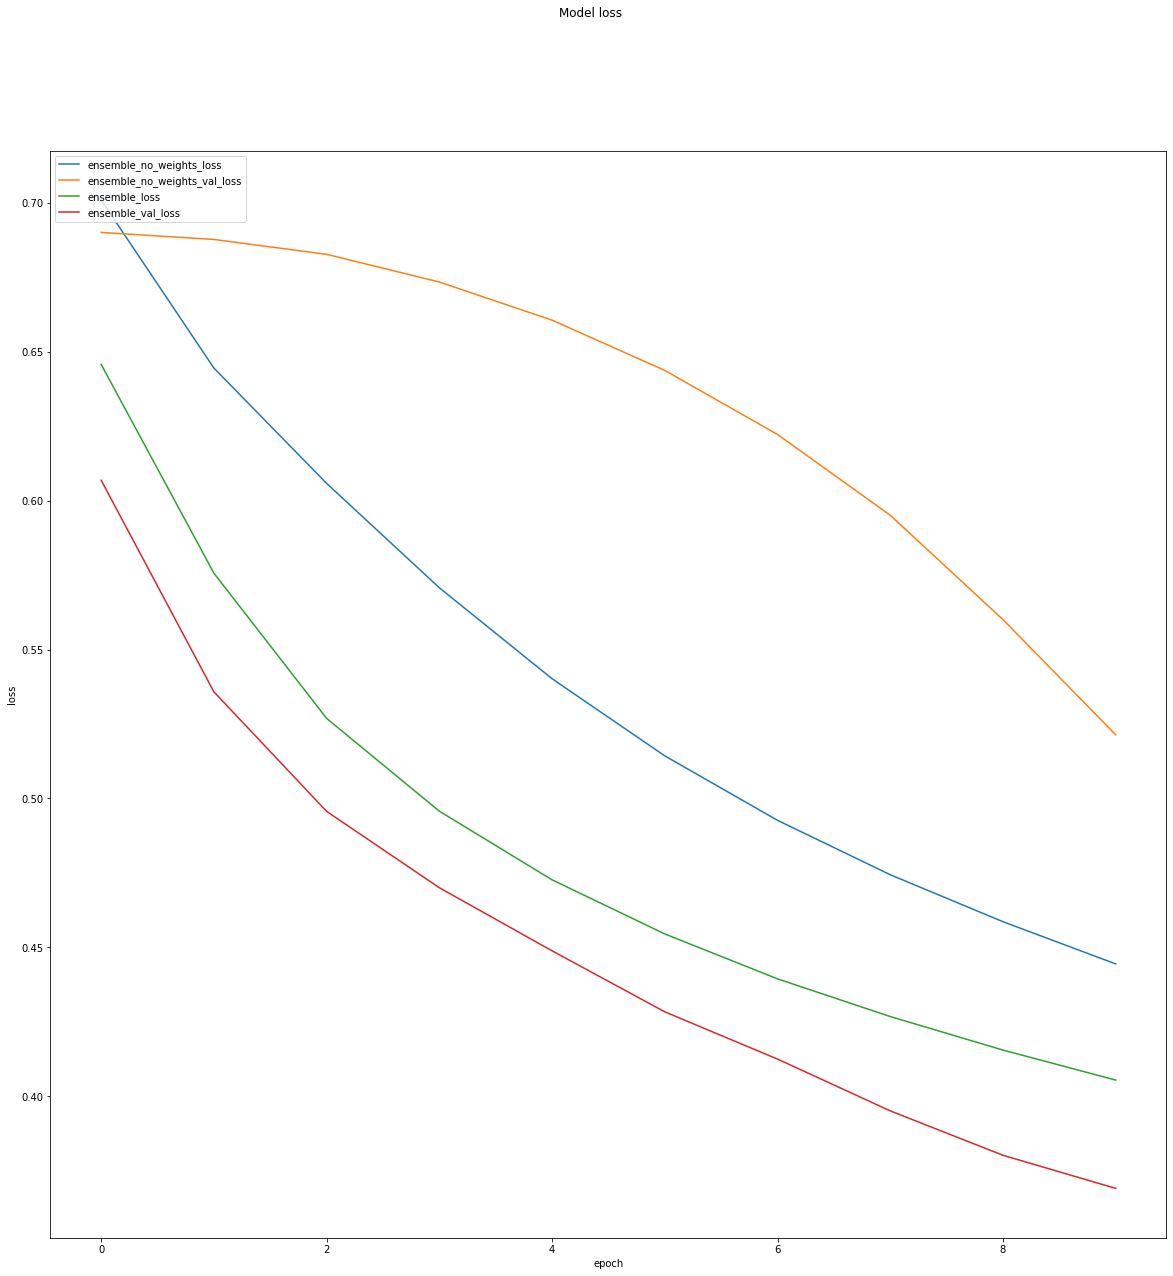

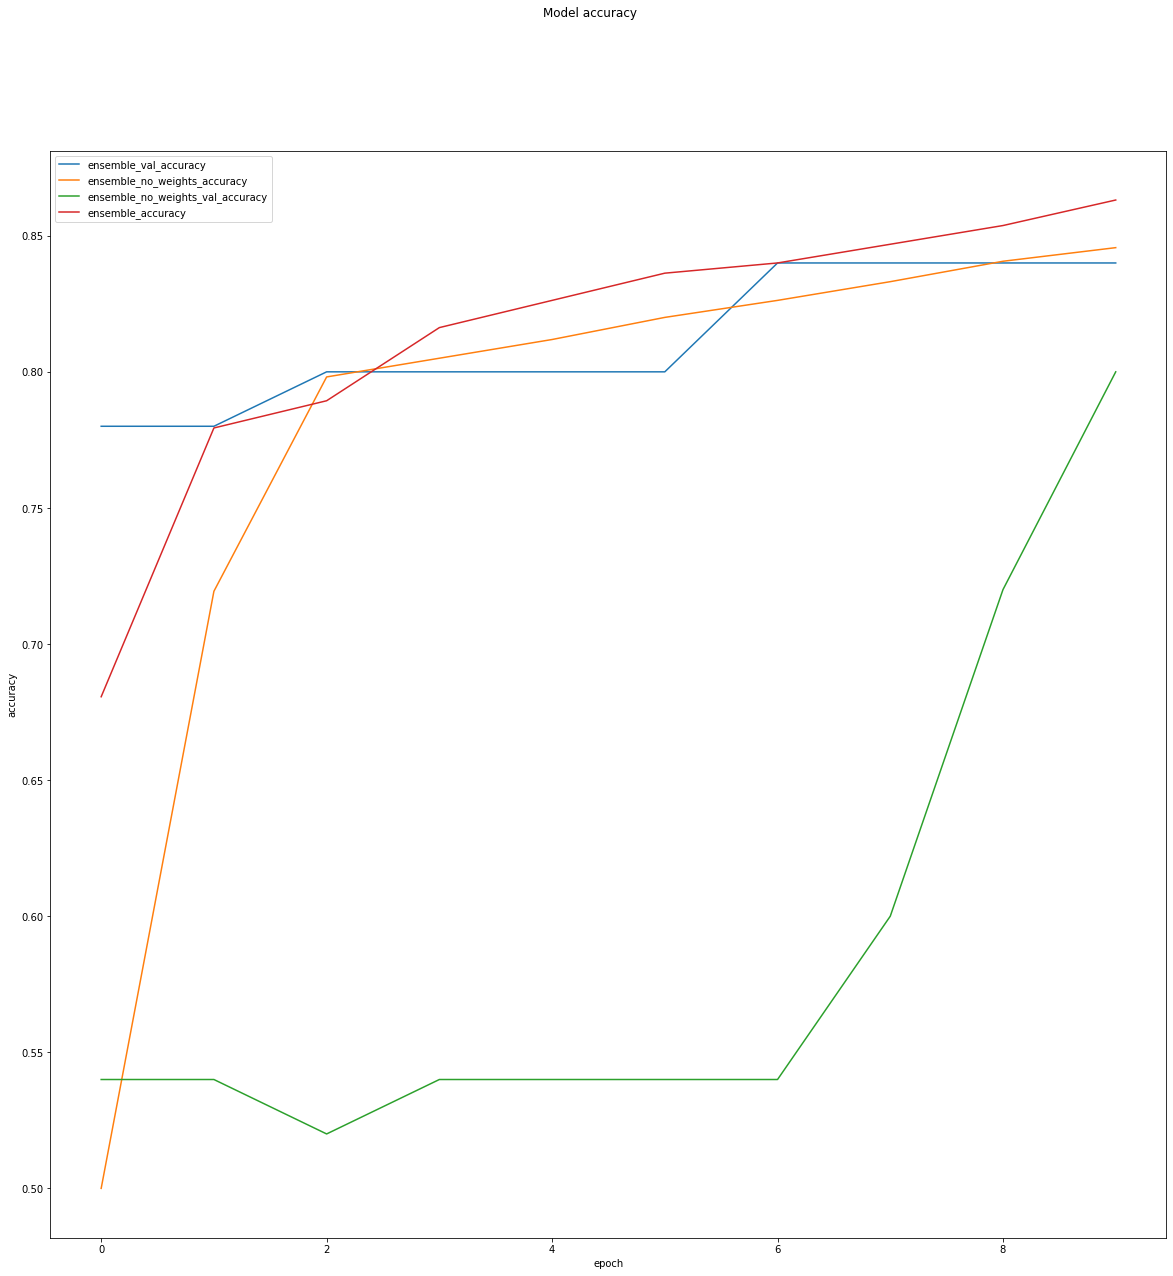

In [3]:
mlflow.set_experiment("Transfer learning - same category, ensemble - 1 fcn")
mlflow.tensorflow.autolog(log_models=False)
mlflow_logging = MlFlowLogging()
category = "ECG"
component_experiment_id="861748084231733287"
for target_dataset in ConcatenatedDataset().return_datasets_for_category(category):
    with mlflow.start_run(run_name=f"Parent run - {target_dataset}"):
        ensemble_training_results = train_ensemble_model(
            category=category,
            target_dataset=target_dataset,
            component_experiment_id=component_experiment_id,
        )
        plain_training_results = train_plain_model(
            ensemble_training_results["model"], target_dataset=target_dataset
        )
        history = {
            **ensemble_training_results["history"],
            **plain_training_results["history"],
        }
        mlflow_logging.log_history(history)